<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


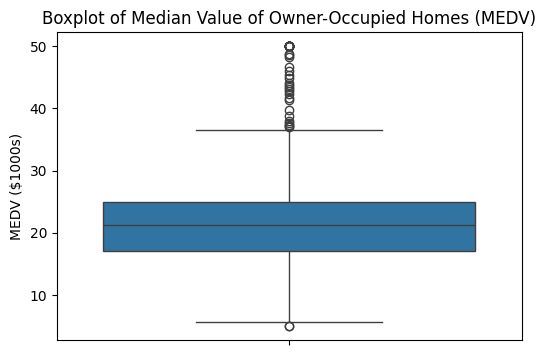

In [5]:
# Boxplot for "Median value of owner-occupied homes" (MEDV)
pyplot.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('MEDV ($1000s)')
pyplot.show()

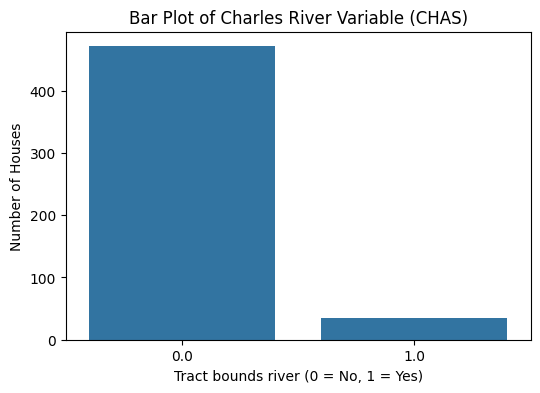

In [6]:
# Bar plot for the Charles river variable (CHAS)
pyplot.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable (CHAS)')
pyplot.xlabel('Tract bounds river (0 = No, 1 = Yes)')
pyplot.ylabel('Number of Houses')
pyplot.show()

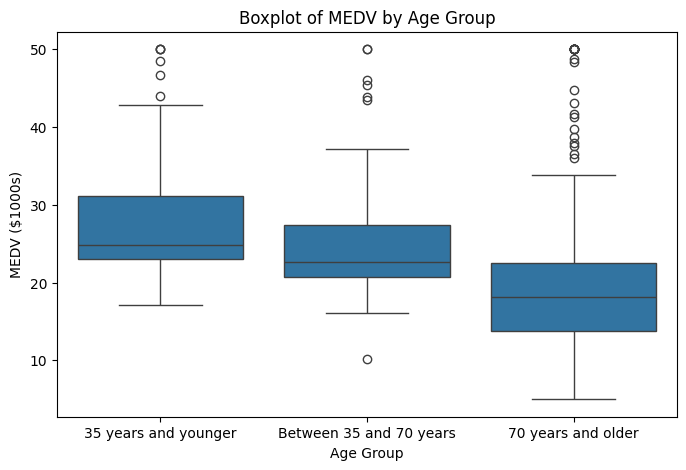

In [7]:
# Boxplot for MEDV vs discretized AGE
age_bins = [0, 35, 70, boston_df['AGE'].max()]
age_labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

pyplot.figure(figsize=(8, 5))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV ($1000s)')
pyplot.show()


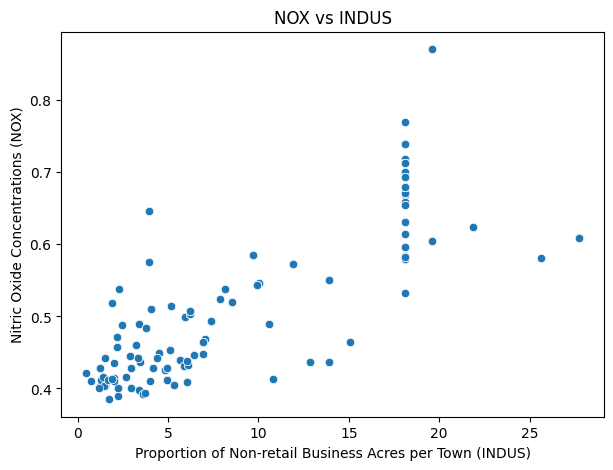

In [8]:
# Scatter plot: Nitric oxide concentrations (NOX) vs non-retail business acres per town (INDUS)
pyplot.figure(figsize=(7, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('NOX vs INDUS')
pyplot.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()

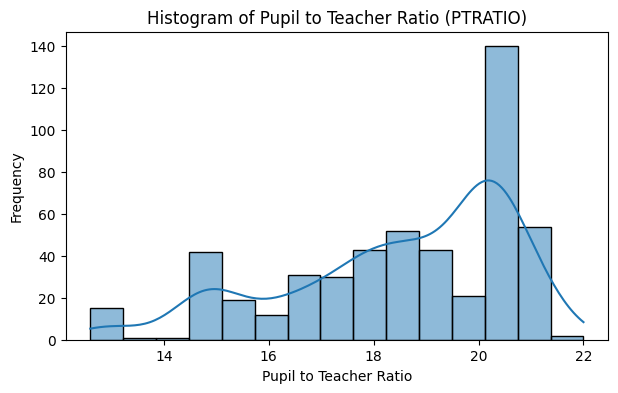

In [9]:
# Histogram for pupil to teacher ratio (PTRATIO)
pyplot.figure(figsize=(7, 4))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [10]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr

# 1. T-test for independent samples: MEDV by CHAS (Charles River)
print("1. T-test for independent samples: MEDV by CHAS")

# State hypothesis
print("Null hypothesis: There is no significant difference in median value of houses bounded by the Charles river (CHAS=1) or not (CHAS=0).")
print("Alternative hypothesis: There is a significant difference.")

# Split data
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_val = ttest_ind(medv_chas1, medv_chas0, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference found.")

print("\n" + "-"*80 + "\n")

1. T-test for independent samples: MEDV by CHAS
Null hypothesis: There is no significant difference in median value of houses bounded by the Charles river (CHAS=1) or not (CHAS=0).
Alternative hypothesis: There is a significant difference.
T-statistic: 3.1133, p-value: 0.0036
Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river.

--------------------------------------------------------------------------------



In [11]:
# 2. ANOVA: MEDV by AGE_group
print("2. ANOVA: MEDV by AGE_group")

# State hypothesis
print("Null hypothesis: There is no difference in median values of houses (MEDV) for each AGE group.")
print("Alternative hypothesis: There is a difference.")

# Prepare groups
groups = [boston_df[boston_df['AGE_group'] == label]['MEDV'] for label in age_labels]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a difference in MEDV between AGE groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No difference found.")

print("\n" + "-"*80 + "\n")

2. ANOVA: MEDV by AGE_group
Null hypothesis: There is no difference in median values of houses (MEDV) for each AGE group.
Alternative hypothesis: There is a difference.
F-statistic: 36.4076, p-value: 0.0000
Conclusion: Reject the null hypothesis. There is a difference in MEDV between AGE groups.

--------------------------------------------------------------------------------



In [12]:
# 3. Pearson Correlation: NOX and INDUS
print("3. Pearson Correlation: NOX and INDUS")

# State hypothesis
print("Null hypothesis: There is no relationship between NOX and INDUS.")
print("Alternative hypothesis: There is a relationship.")

corr_coef, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson correlation coefficient: {corr_coef:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant relationship found.")

print("\n" + "-"*80 + "\n")

3. Pearson Correlation: NOX and INDUS
Null hypothesis: There is no relationship between NOX and INDUS.
Alternative hypothesis: There is a relationship.
Pearson correlation coefficient: 0.7637, p-value: 0.0000
Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.

--------------------------------------------------------------------------------



In [13]:
# 4. Regression analysis: DIS (distance) impact on MEDV
print("4. Regression analysis: Impact of DIS on MEDV")
import statsmodels.api as sm

# State hypothesis
print("Null hypothesis: Weighted distance to employment centres (DIS) has no impact on MEDV.")
print("Alternative hypothesis: DIS has an impact on MEDV.")

X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary().tables[1])

p_val = model.pvalues['DIS']
coef = model.params['DIS']

if p_val < 0.05:
    print(f"Conclusion: Reject the null hypothesis. DIS has a significant impact on MEDV. Coefficient: {coef:.4f}")
else:
    print("Conclusion: Fail to reject the null hypothesis. DIS does not have a significant impact on MEDV.")

4. Regression analysis: Impact of DIS on MEDV
Null hypothesis: Weighted distance to employment centres (DIS) has no impact on MEDV.
Alternative hypothesis: DIS has an impact on MEDV.
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
Conclusion: Reject the null hypothesis. DIS has a significant impact on MEDV. Coefficient: 1.0916
